In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib notebook 



In [2]:
TFtable = []
hits_list = []
with open('/Users/bergeric/Projects/s2rnai/data/hitcount.txt') as g: 
    for line in g:
        if not line.strip().startswith('1 ##gff-version'):
            hits = int(line.split()[0])
            hits_list.append(hits)
            TF = line.split()[1]
            if hits > 100:
                TFtable.append((TF))

hitdf = pd.DataFrame(TFtable, columns=['TF'])


hitdf.head()

,TF
0,FBgn0000008
1,FBgn0000014
2,FBgn0000015
3,FBgn0000017
4,FBgn0000024


In [198]:
table = []
with open('/Users/bergeric/Projects/s2rnai/data/motif_alignments_dmmpmm2009_dm6.gff') as f:
    for line in f: 
        if not line.startswith('##'):
            broken = line.split('\t')
            pattern = broken[8].split(';')[3]
            pval = float(broken[8].split(';')[2][7:])
            qval = float(pattern[7:].strip())
            TF = broken[8].split(';')[0][5:]
            gene = broken[0]
            stuff = (TF, gene, qval, pval)
            table.append(stuff)

In [199]:
df= pd.DataFrame(table, columns=['TF', 'gene', 'q-value', 'p-value'])
df.head()

,TF,gene,q-value,p-value
0,bcd,FBgn0031208,1.0,0.000033
1,bcd,FBgn0031208,1.0,0.000197
2,bcd,FBgn0002121,1.0,0.000077
3,bcd,FBgn0002121,1.0,0.000234
4,bcd,FBgn0002121,1.0,0.000492


In [200]:
grp1 = df.groupby('TF')
grp1.describe()

p-value                                                            \
           count      mean           std           min       25%       50%   
TF                                                                           
Deaf1    91200.0  0.000194  1.100581e-04  2.230000e-06  0.000097  0.000198   
Dfd      46418.0  0.000060  2.709213e-05  3.230000e-05  0.000032  0.000059   
Dref     50440.0  0.000098  5.993967e-05  1.350000e-06  0.000044  0.000094   
Eip74EF  47294.0  0.000096  4.973941e-05  1.470000e-05  0.000063  0.000104   
Kr       90542.0  0.000208  1.255684e-04  1.350000e-06  0.000101  0.000204   
Mad      95051.0  0.000148  8.568296e-05  9.310000e-08  0.000076  0.000147   
Med      99330.0  0.000109  6.919940e-05  2.270000e-07  0.000049  0.000105   
Trl      99997.0  0.000069  5.420604e-05  1.880000e-08  0.000017  0.000060   
bcd      87925.0  0.000290  1.493215e-04  1.470000e-05  0.000167  0.000303   
br-Z1    33402.0  0.000045  2.295569e-05  2.650000e-05  0.000027  0.000027   
br-Z2    43914.0  0.000139  4.780505e-05  9.660000e-05  0.000097  0.000097   
br-Z3    72541.0  0.000079  3.459087e-05  1.480000e-06  0.000055  0.000078   
br-Z4    62412.0  0.000111  3.348521e-05  5.300000e-05  0.000118  0.000118   
brk      78103.0  0.000140  7.705718e-05  2.960000e-05  0.000066  0.000146   
byn      80670.0  0.000163  9.573234e-05  1.210000e-05  0.000092  0.000142   
cad      51928.0  0.000060  3.269335e-05  7.280000e-06  0.000039  0.000059   
dl       93844.0  0.000107  6.556415e-05  1.680000e-07  0.000052  0.000101   
en       47321.0  0.000065  2.499881e-05  2.180000e-05  0.000048  0.000075   
eve      93966.0  0.000165  9.409968e-05  4.350000e-05  0.000097  0.000132   
ftz      82421.0  0.000120  7.204006e-05  2.180000e-05  0.000048  0.000106   
grh      56134.0  0.000237  1.084212e-19  2.370000e-04  0.000237  0.000237   
gt       82507.0  0.000219  8.920257e-05  9.660000e-05  0.000097  0.000272   
hb       63824.0  0.000035  1.915080e-05  7.280000e-06  0.000022  0.000029   
kni      56085.0  0.000067  3.856016e-05  2.290000e-08  0.000034  0.000067   
ovo      64088.0  0.000419  1.394761e-04  2.370000e-04  0.000237  0.000526   
prd      92679.0  0.000240  1.291927e-04  1.790000e-05  0.000141  0.000249   
sd       53503.0  0.000049  3.118861e-05  8.340000e-08  0.000020  0.000047   
slbo     54201.0  0.000069  4.181253e-05  9.090000e-07  0.000032  0.000063   
sna      87999.0  0.000179  1.115768e-04  2.720000e-06  0.000077  0.000170   
tin      64412.0  0.000135  5.795470e-05  6.510000e-05  0.000065  0.000144   
tll      94294.0  0.000141  7.821385e-05  2.180000e-05  0.000066  0.000168   
ttk      49970.0  0.000172  6.368468e-05  4.390000e-05  0.000204  0.000204   
twi      93186.0  0.000191  1.084660e-04  1.790000e-05  0.000087  0.000209   
vvl      38083.0  0.000352  5.421082e-20  3.520000e-04  0.000352  0.000352   
z        61658.0  0.000237  1.084211e-19  2.370000e-04  0.000237  0.000237   

                             q-value                                         \
              75%       max    count      mean           std     min    25%   
TF                                                                            
Deaf1    0.000290  0.000387  91200.0  0.968581  4.096314e-02  0.7870  0.980   
Dfd      0.000085  0.000107  46418.0  0.457459  4.850480e-02  0.4080  0.408   
Dref     0.000158  0.000199  50440.0  0.812940  1.229978e-01  0.3210  0.794   
Eip74EF  0.000144  0.000173  47294.0  0.828811  1.358638e-02  0.7910  0.832   
Kr       0.000317  0.000428  90542.0  0.973808  5.993782e-02  0.6660  0.995   
Mad      0.000219  0.000297  95051.0  0.724356  1.122301e-02  0.6930  0.716   
Med      0.000169  0.000236  99330.0  0.480360  7.607670e-02  0.2610  0.464   
Trl      0.000115  0.000172  99997.0  0.256381  1.217662e-01  0.0115  0.160   
bcd      0.000411  0.000510  87925.0  1.000000  0.000000e+00  1.0000  1.000   
br-Z1    0.000075  0.000097  33402.0  0.431065  1.031724e-01  0.3480  0.348   
br-Z2    0.000193

In [203]:
indexTF = df.set_index(['TF'])
df2 = df[["TF","q-value","p-value"]]
#sub = df2.iloc[:5000,:]
groups = df2.groupby(['TF'])
print(groups['q-value'])

###### zip(df2, axes.flatten())


<IPython.core.display.Javascript object>


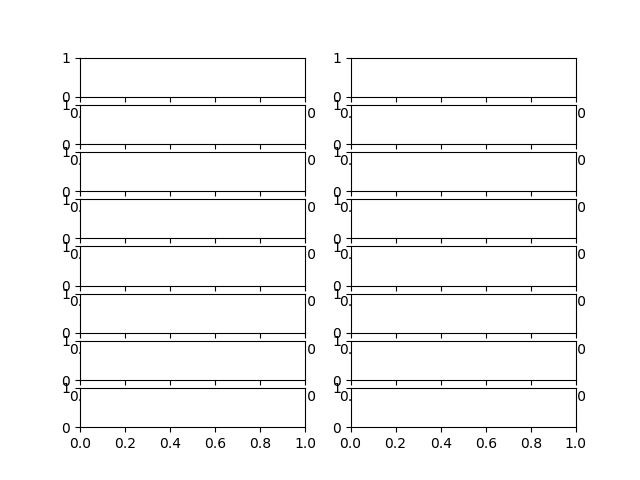

In [30]:
fig, axes = plt.subplots(8,2)

<IPython.core.display.Javascript object>


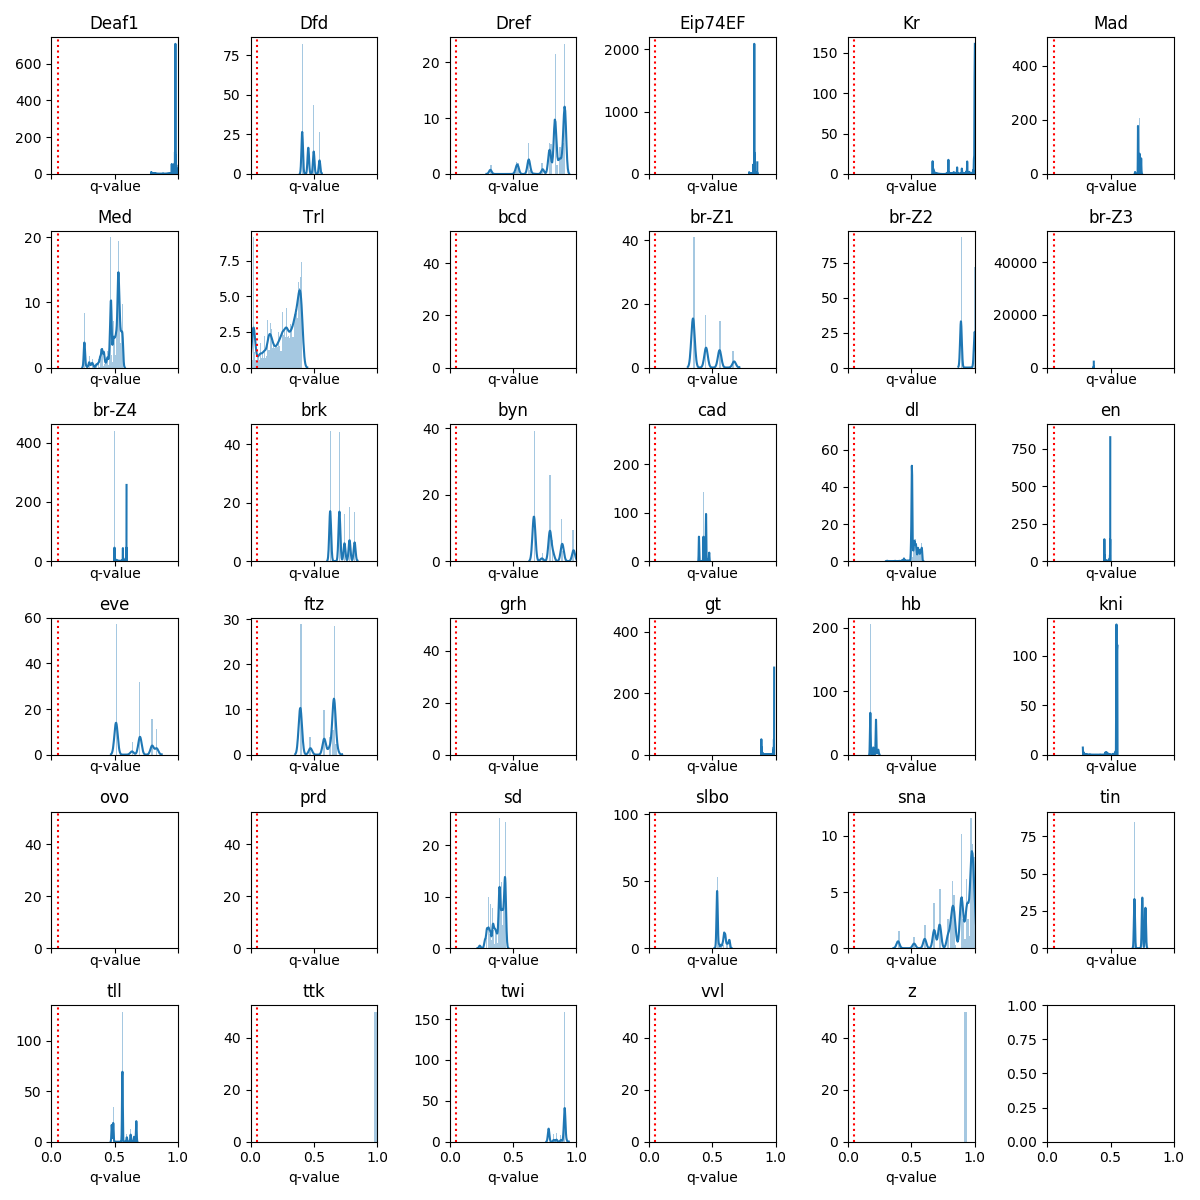

/Users/bergeric/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/bergeric/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


In [192]:
x= groups['q-value']

fig, axes = plt.subplots(6,6, figsize=(12,12), sharex=True)
#axr = axes.ravel()

#zip(groups, axes.flatten())
for ax, x in zip(axes.flat, x):
    sb.distplot(x[1], ax=ax)
    ax.set_title(x[0])
    ax.axvline(0.05, color='r', ls=':')
    #axes.flat[-1].set_visible(False)
ax.set_xlim(0,1)
plt.tight_layout()

<IPython.core.display.Javascript object>


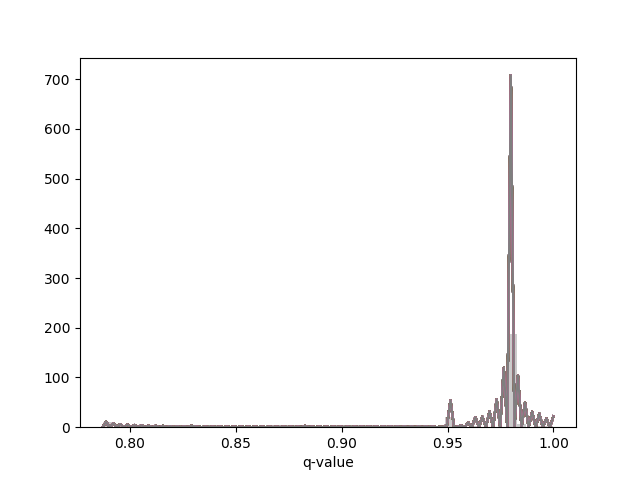

e


TypeError: string indices must be integers

In [80]:
fig, ax = plt.subplots(1, 1)
print(x[1])
sb.distplot(x[1]['q-value'], hist=False, ax=ax, )
ax.set_title(x[0])
ax.axvline(0.05, color='r', ls=':')

In [55]:
plt.gca()
plt.show()

<IPython.core.display.Javascript object>


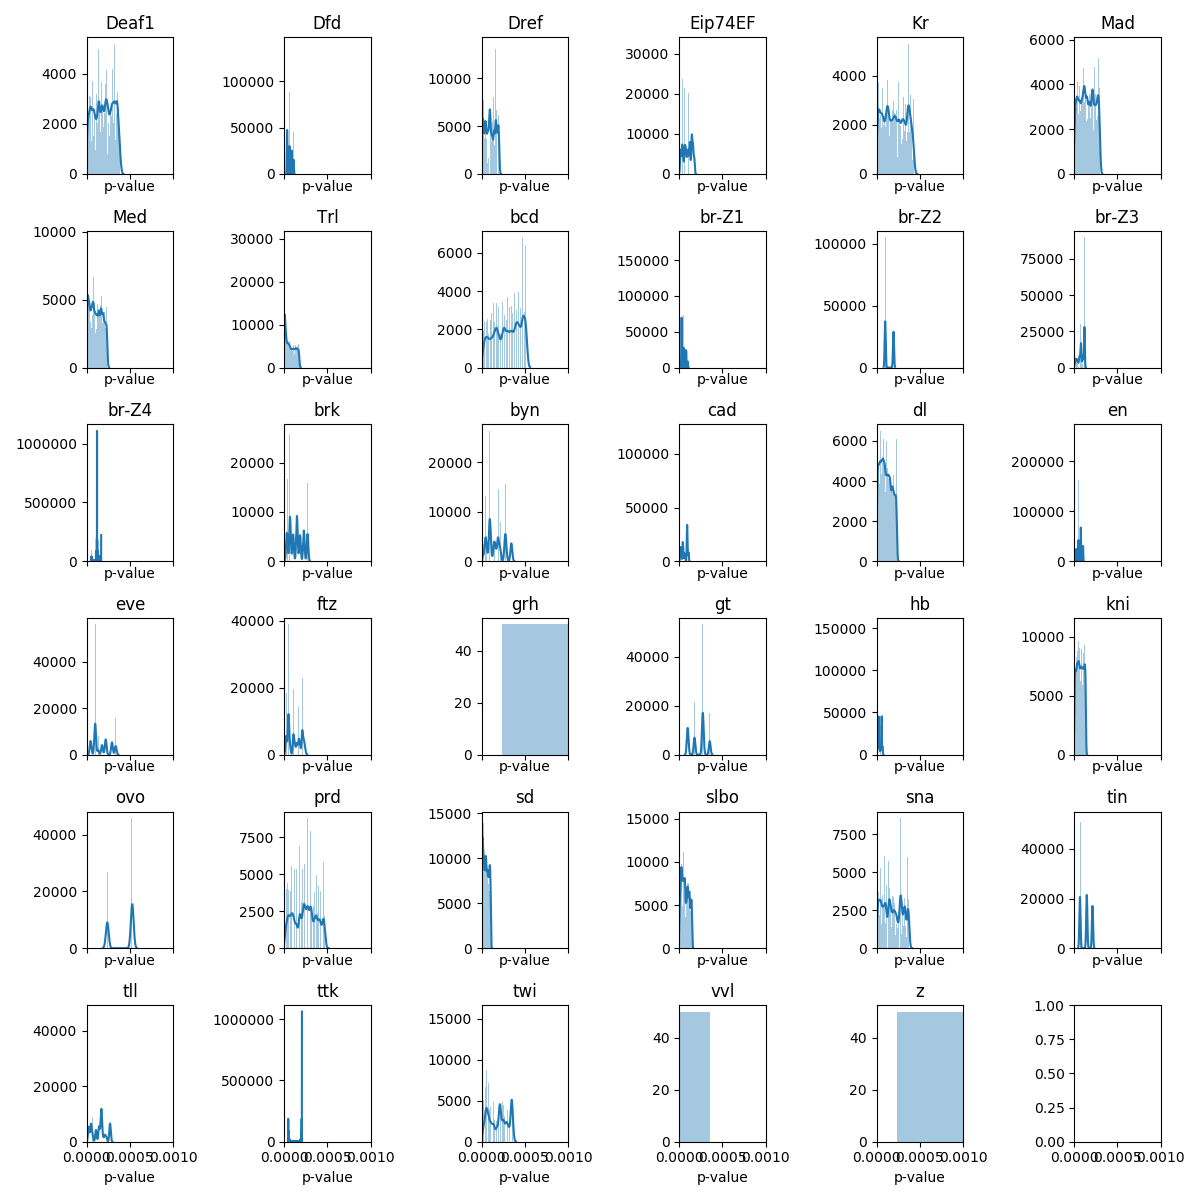

/Users/bergeric/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/bergeric/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


In [207]:
x= groups['p-value']

fig, axes = plt.subplots(6,6, figsize=(12,12), sharex=True)
#axr = axes.ravel()

#zip(groups, axes.flatten())
for ax, x in zip(axes.flat, x):
    sb.distplot(x[1], ax=ax)
    ax.set_title(x[0])
    ax.axvline(0.05, color='r', ls=':')
    #axes.flat[-1].set_visible(False)
ax.set_xlim(0,0.001)
plt.tight_layout()